## Climate-DT Healpix data

This notebook is a simple example of how to use the Healpix data from the Climate-DT dataset. The Climate-DT dataset is a dataset of climate data that is stored in GRIB2 WMO standard format and served via Polytope from the Destination Earth data store. The Healpix grid is a way of storing data on the sphere that is used in astronomy and other fields, where the grid of pixels on the sphere is spread equally on the sphere. 

The Climate-DT dataset contains data on temperature, precipitation, and other climate variables. 
In this notebook, we will show how to read the data from the Climate-DT dataset, interpolate it to a Regular Lat-Lon grid, plot it on a map or transform it to NetCDF format.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py -u <user_name> -p <password>

This will generate a token that can then be used by earthkit and polytope.

You can also run the script without arguments to enter your username and password.

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py 

In [7]:
import earthkit.data
import earthkit.maps
import earthkit.regrid


request = {
    'activity': 'ScenarioMIP',
    'class': 'd1',
    'dataset': 'climate-dt',
    'date': '20200102',
    'experiment': 'SSP3-7.0',
    'expver': '0001',
    'generation': '1',
    'levtype': 'sfc',
    'model': 'IFS-NEMO',
    'param': '134/165/166',
    'realization': '1',
    'resolution': 'standard',
    'stream': 'clte',
    'time': '0100', # '0100/0200/0300/0400/0500/0600'
    'type': 'fc'
}

# data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)

2024-05-14 14:53:13 - INFO - Key read from /Users/maaw/.polytopeapirc
2024-05-14 14:53:13 - INFO - Sending request...
{'request': 'activity: ScenarioMIP\n'
            'class: d1\n'
            'dataset: climate-dt\n'
            "date: '20200102'\n"
            'experiment: SSP3-7.0\n'
            "expver: '0001'\n"
            "generation: '1'\n"
            'levtype: sfc\n'
            'model: IFS-NEMO\n'
            'param: 134/165/166\n'
            "realization: '1'\n"
            'resolution: standard\n'
            'stream: clte\n'
            "time: '0100'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-05-14 14:53:13 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 14:53:15 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/a1076d2e-ec63-43b4-bff4-293b5d80e8d3 for status
2024-05-14 14:53:15 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 14:53:15 - INFO - Checkin

a1076d2e-ec63-43b4-bff4-293b5d80e8d3:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

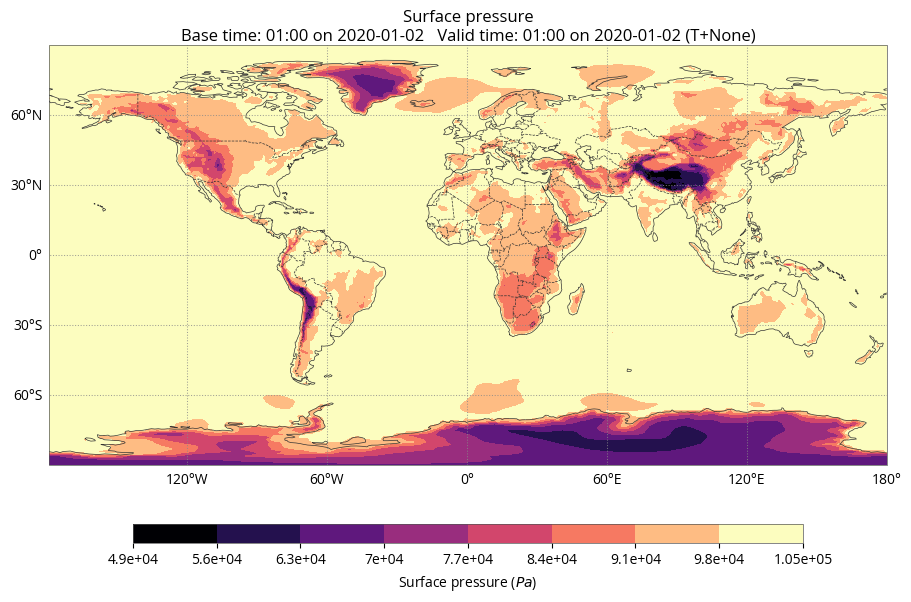

In [8]:
earthkit.maps.quickplot(data[0])

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,fc,None,healpix
1,ecmf,10u,heightAboveGround,10,20200102,100,0,fc,None,healpix
2,ecmf,10v,heightAboveGround,10,20200102,100,0,fc,None,healpix


In [10]:
# interpolate to a 1x1 degree lat-lon regular grid (in memory)
data_latlon = earthkit.regrid.interpolate(data, out_grid={"grid": [1,1]}, method="linear")

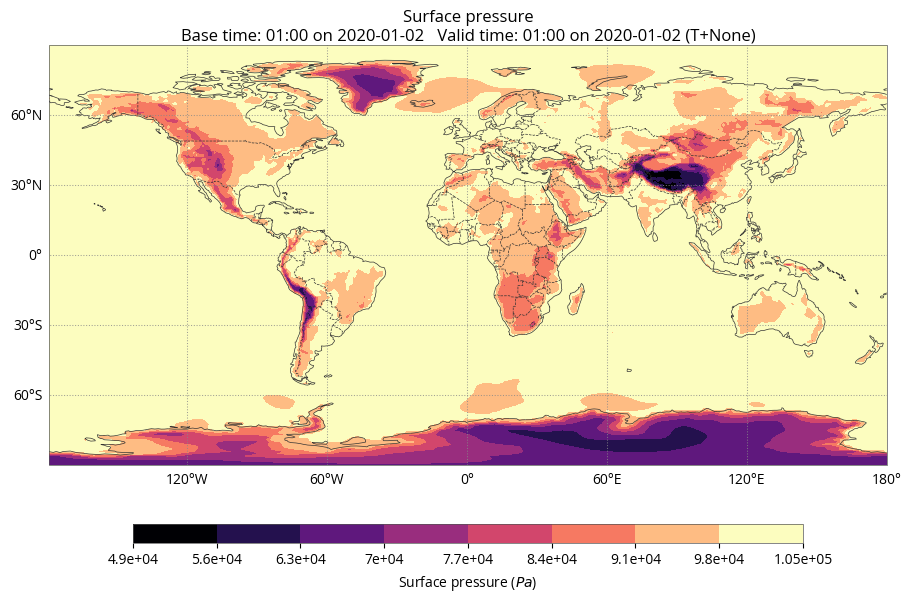

In [11]:
earthkit.maps.quickplot(data_latlon[0])

In [6]:
data_latlon.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,sp,surface,0,20200102,100,0,fc,None,regular_ll
1,ecmf,10u,heightAboveGround,10,20200102,100,0,fc,None,regular_ll
2,ecmf,10v,heightAboveGround,10,20200102,100,0,fc,None,regular_ll


In [57]:
data_latlon.save("data_latlon.nc")